In [184]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score,confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [185]:
data = pd.read_csv('Lung1.clinical.csv')
data

,PatientID,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus.event
0,LUNG1-001,78.7515,2.0,3,0,IIIb,large cell,male,2165,1
1,LUNG1-002,83.8001,2.0,0,0,I,squamous cell carcinoma,male,155,1
2,LUNG1-003,68.1807,2.0,3,0,IIIb,large cell,male,256,1
3,LUNG1-004,70.8802,2.0,1,0,II,squamous cell carcinoma,male,141,1
4,LUNG1-005,80.4819,4.0,2,0,IIIb,squamous cell carcinoma,male,353,1
...,...,...,...,...,...,...,...,...,...,...
417,LUNG1-418,53.6712,2.0,0,0,I,adenocarcinoma,male,282,0
418,LUNG1-419,66.5096,4.0,1,0,IIIb,squamous cell carcinoma,male,283,0
419,LUNG1-420,73.3808,2.0,1,0,II,squamous cell carcinoma,male,282,0
420,LUNG1-421,61.7041,2.0,2,0,IIIa,squamous cell carcinoma,female,282,0


In [186]:
nulls_summary = pd.DataFrame(data.isnull().any(), columns=['Nulls'])
nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(data.isnull().sum())
nulls_summary['Num_of_nulls [%]'] = round((data.isnull().mean()*100),2)
print(nulls_summary)

                  Nulls  Num_of_nulls [qty]  Num_of_nulls [%]
PatientID         False                   0              0.00
age                True                  22              5.21
clinical.T.Stage   True                   1              0.24
Clinical.N.Stage  False                   0              0.00
Clinical.M.Stage  False                   0              0.00
Overall.Stage      True                   1              0.24
Histology          True                  42              9.95
gender            False                   0              0.00
Survival.time     False                   0              0.00
deadstatus.event  False                   0              0.00


age                                                   (nan, nan)
clinical.T.Stage                                      (nan, nan)
Clinical.N.Stage                       (3643.4417958395056, 0.0)
Clinical.M.Stage     (700.7500031224572, 6.824490367540774e-153)
Survival.time       (104.74239109017154, 1.8008550750091275e-23)
deadstatus.event                       (1948.7550189062279, 0.0)
dtype: object

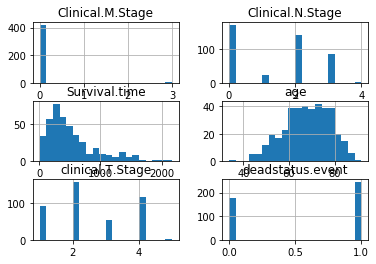

In [187]:

data.hist(bins=20) # histogram dla wszystkich zmiennych

data.select_dtypes([float, int]).apply(stats.normaltest)

In [188]:
data = data.drop('PatientID', axis = 1)
data

,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus.event
0,78.7515,2.0,3,0,IIIb,large cell,male,2165,1
1,83.8001,2.0,0,0,I,squamous cell carcinoma,male,155,1
2,68.1807,2.0,3,0,IIIb,large cell,male,256,1
3,70.8802,2.0,1,0,II,squamous cell carcinoma,male,141,1
4,80.4819,4.0,2,0,IIIb,squamous cell carcinoma,male,353,1
...,...,...,...,...,...,...,...,...,...
417,53.6712,2.0,0,0,I,adenocarcinoma,male,282,0
418,66.5096,4.0,1,0,IIIb,squamous cell carcinoma,male,283,0
419,73.3808,2.0,1,0,II,squamous cell carcinoma,male,282,0
420,61.7041,2.0,2,0,IIIa,squamous cell carcinoma,female,282,0


In [189]:
data = data.dropna()
data

,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus.event
0,78.7515,2.0,3,0,IIIb,large cell,male,2165,1
1,83.8001,2.0,0,0,I,squamous cell carcinoma,male,155,1
2,68.1807,2.0,3,0,IIIb,large cell,male,256,1
3,70.8802,2.0,1,0,II,squamous cell carcinoma,male,141,1
4,80.4819,4.0,2,0,IIIb,squamous cell carcinoma,male,353,1
...,...,...,...,...,...,...,...,...,...
416,65.5616,4.0,2,0,IIIb,squamous cell carcinoma,male,289,0
417,53.6712,2.0,0,0,I,adenocarcinoma,male,282,0
418,66.5096,4.0,1,0,IIIb,squamous cell carcinoma,male,283,0
419,73.3808,2.0,1,0,II,squamous cell carcinoma,male,282,0


In [190]:
data.shape

(365, 9)

In [191]:

#sprawdzam gdzie występują wartości odstające
Q_first = data.quantile(0.25)
Q_third = data.quantile(0.75)
iqr = Q_third-Q_first
low_boundary = (Q_first - 1.5 * iqr)
upp_boundary = (Q_third + 1.5 * iqr)
num_of_outliers_L = (data[iqr.index] < low_boundary).sum()
num_of_outliers_U = (data[iqr.index] > upp_boundary).sum()
wartosci_odstajace = pd.DataFrame({'niska_granica':low_boundary, 'wysoka_granica':upp_boundary,\
                         'wartosci_odstajace_L':num_of_outliers_L, 'wartosci_odstajace_U':num_of_outliers_U}) 
wartosci_odstajace

,niska_granica,wysoka_granica,wartosci_odstajace_L,wartosci_odstajace_U
age,39.6976,97.7288,1,0
clinical.T.Stage,-1.0000,7.0000,0,0
Clinical.N.Stage,-3.0000,5.0000,0,0
Clinical.M.Stage,0.0000,0.0000,0,4
Survival.time,-357.0000,1291.0000,0,30
deadstatus.event,-1.5000,2.5000,0,0


In [192]:

X, y = data.drop("deadstatus.event", axis=1), data['deadstatus.event']

In [193]:
y

0      1
1      1
2      1
3      1
4      1
      ..
416    0
417    0
418    0
419    0
420    0
Name: deadstatus.event, Length: 365, dtype: int64

In [194]:
y.unique()

array([1, 0])

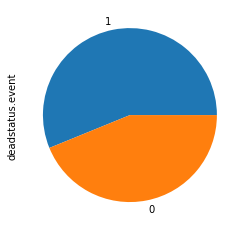

In [195]:
data['deadstatus.event'].value_counts().plot(kind='pie')

In [196]:
y = LabelEncoder().fit_transform(y)

In [197]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [198]:
X_enc = pd.get_dummies(X)

In [199]:
X_enc

,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Survival.time,Overall.Stage_I,Overall.Stage_II,Overall.Stage_IIIa,Overall.Stage_IIIb,Histology_adenocarcinoma,Histology_large cell,Histology_nos,Histology_squamous cell carcinoma,gender_female,gender_male
0,78.7515,2.0,3,0,2165,0,0,0,1,0,1,0,0,0,1
1,83.8001,2.0,0,0,155,1,0,0,0,0,0,0,1,0,1
2,68.1807,2.0,3,0,256,0,0,0,1,0,1,0,0,0,1
3,70.8802,2.0,1,0,141,0,1,0,0,0,0,0,1,0,1
4,80.4819,4.0,2,0,353,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,65.5616,4.0,2,0,289,0,0,0,1,0,0,0,1,0,1
417,53.6712,2.0,0,0,282,1,0,0,0,1,0,0,0,0,1
418,66.5096,4.0,1,0,283,0,0,0,1,0,0,0,1,0,1
419,73.3808,2.0,1,0,282,0,1,0,0,0,0,0,1,0,1


In [200]:

X_train_val, X_test, y_train_val, y_test = train_test_split(X_enc, y, test_size=0.2, random_state=123)

In [201]:

log_reg = LogisticRegression()
log_reg.fit(X_train_val, y_train_val)

/home/pattom/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [202]:

y_pred = log_reg.predict(X_test)
y_pred[:30]

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0])

In [203]:

y_prob = log_reg.predict_proba(X_test)
y_prob[:30]

array([[0.60073904, 0.39926096],
       [0.28075774, 0.71924226],
       [0.9644156 , 0.0355844 ],
       [0.45949089, 0.54050911],
       [0.51938973, 0.48061027],
       [0.54268804, 0.45731196],
       [0.32168172, 0.67831828],
       [0.31558987, 0.68441013],
       [0.20166619, 0.79833381],
       [0.58716254, 0.41283746],
       [0.28822778, 0.71177222],
       [0.25682054, 0.74317946],
       [0.46652643, 0.53347357],
       [0.23319491, 0.76680509],
       [0.59118817, 0.40881183],
       [0.18804716, 0.81195284],
       [0.18793069, 0.81206931],
       [0.72017598, 0.27982402],
       [0.2437634 , 0.7562366 ],
       [0.32353681, 0.67646319],
       [0.35730804, 0.64269196],
       [0.35807851, 0.64192149],
       [0.37827436, 0.62172564],
       [0.46214162, 0.53785838],
       [0.29645499, 0.70354501],
       [0.68999606, 0.31000394],
       [0.34281829, 0.65718171],
       [0.2767065 , 0.7232935 ],
       [0.49694282, 0.50305718],
       [0.55121453, 0.44878547]])

Accuracy: 0.7397260273972602


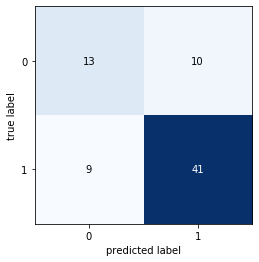

In [204]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

In [205]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.57      0.58        23
           1       0.80      0.82      0.81        50

    accuracy                           0.74        73
   macro avg       0.70      0.69      0.69        73
weighted avg       0.74      0.74      0.74        73



In [206]:
X_train_val.head(3)

,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Survival.time,Overall.Stage_I,Overall.Stage_II,Overall.Stage_IIIa,Overall.Stage_IIIb,Histology_adenocarcinoma,Histology_large cell,Histology_nos,Histology_squamous cell carcinoma,gender_female,gender_male
188,64.1916,4.0,3,0,65,0,0,0,1,0,1,0,0,0,1
289,60.0986,2.0,3,0,321,0,0,0,1,0,0,0,1,1,0
118,56.5969,4.0,2,0,1384,0,0,0,1,0,1,0,0,1,0


In [207]:
X_test.head(3)

,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Survival.time,Overall.Stage_I,Overall.Stage_II,Overall.Stage_IIIa,Overall.Stage_IIIb,Histology_adenocarcinoma,Histology_large cell,Histology_nos,Histology_squamous cell carcinoma,gender_female,gender_male
67,79.2827,2.0,3,0,916,0,0,0,1,0,0,0,1,0,1
362,68.3178,4.0,2,0,107,0,0,0,1,0,0,0,1,0,1
9,71.0554,4.0,3,0,2119,0,0,0,1,0,0,0,1,1,0


In [208]:

algorithms = {
    'knn': KNeighborsClassifier(),
    'dt': DecisionTreeClassifier(),
    'rf': RandomForestClassifier()
}

In [209]:
kfold = KFold(n_splits=15, random_state=456)

/home/pattom/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [210]:
tree_params_grid = {
    'max_depth': [3, 5, 10, 20],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 5, 10, 20]
}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params_grid, cv=kfold, n_jobs=3)
grid_tree_results = grid_tree.fit(X_train_val, y_train_val)

In [211]:
grid_tree_results.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [212]:
algorithms['dt'] = grid_tree_results.best_estimator_

In [213]:
results = {}
for algo_name, algo in algorithms.items():
    algo_results = cross_val_score(algo, X_train_val, y_train_val, cv=kfold, n_jobs=4)
    results['model_' + algo_name] = algo_results

In [214]:
results_df = pd.DataFrame.from_dict(results)

In [215]:

results_df.mean(axis=0)

model_knn    0.643509
model_dt     0.715965
model_rf     0.657895
dtype: float64

In [216]:
results_df.std(axis=0)

model_knn    0.098142
model_dt     0.126090
model_rf     0.115477
dtype: float64

In [217]:
results_df

,model_knn,model_dt,model_rf
0,0.700000,0.750000,0.550000
1,0.650000,0.800000,0.700000
2,0.650000,0.600000,0.800000
3,0.550000,0.750000,0.600000
4,0.700000,0.850000,0.700000
5,0.600000,0.450000,0.550000
6,0.750000,0.750000,0.600000
7,0.842105,0.842105,0.736842
8,0.473684,0.578947,0.578947
9,0.684211,0.894737,0.631579


In [218]:
sts.friedmanchisquare(results_df.model_knn, results_df.model_rf, results_df.model_dt)

FriedmanchisquareResult(statistic=6.576923076923063, pvalue=0.037311207120685135)

In [219]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

In [220]:
results_df2 = results_df.copy()
results_df2['id'] = results_df2.index
results_reformatted = pd.melt(results_df2, id_vars='id').drop('id', axis=1)

In [221]:
results_reformatted

,variable,value
0,model_knn,0.700000
1,model_knn,0.650000
2,model_knn,0.650000
3,model_knn,0.550000
4,model_knn,0.700000
5,model_knn,0.600000
6,model_knn,0.750000
7,model_knn,0.842105
8,model_knn,0.473684
9,model_knn,0.684211


In [222]:
multicomp = MultiComparison(
    data=results_reformatted.value,
    groups=results_reformatted.variable,
)
print(multicomp.tukeyhsd())

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
 model_dt model_knn  -0.0725 0.2014 -0.1734 0.0285  False
 model_dt  model_rf  -0.0581 0.3523  -0.159 0.0429  False
model_knn  model_rf   0.0144    0.9 -0.0866 0.1154  False
---------------------------------------------------------


In [223]:
import scikit_posthocs as sp

In [224]:
pvals = sp.posthoc_tukey(results_reformatted, val_col='value', group_col='variable', )
pvals < 0.05

,model_dt,model_knn,model_rf
model_dt,True,False,False
model_knn,False,True,False
model_rf,False,False,True


In [225]:
pvals

,model_dt,model_knn,model_rf
model_dt,-1.000000,0.201444,0.352313
model_knn,0.201444,-1.000000,0.900000
model_rf,0.352313,0.900000,-1.000000
